# Classification with NNs - Pytorch lightning

This final notebook shows how to adapt the classification examples by means of Feed-forward NNs for [Pytorch-lightining](https://www.pytorchlightning.ai), a Python library built on top of Pytorch to ease research and scaling of models to complex hardware (e.g., multi-gpu)

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pytorch_lightning as pl
import scooby

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader 
from torchsummary import summary

from dataset import make_train_test
from model import SingleHiddenLayerNetwork
from utils import set_seed

set_seed(42)

True

In [2]:
# define the LightningModule
class LitClassifier(pl.LightningModule):
    def __init__(self, network, criterion):
        super().__init__()
        self.network = network
        self.criterion = criterion

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        x, y = batch
        yprob = self.network(x)
        ls = self.criterion(yprob, y)
        # Logging to TensorBoard
        self.log("train_loss", ls)
        return ls
    
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=1)
        return optimizer

Create input dataset

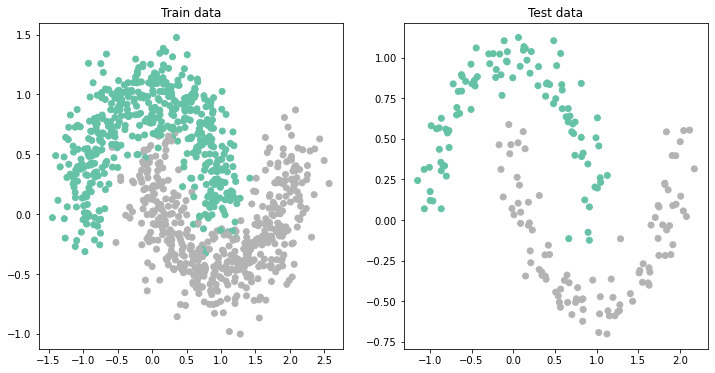

In [3]:
train_size = 1000 # Size of training data
test_size = 200 # Size of test data

X_train, y_train, X_test, y_test, train_loader, test_loader = make_train_test(train_size, test_size, 
                                                                              noise=0.2, batch_size=64)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Set2');
ax[1].set_title('Test data');

Train

In [4]:
network = SingleHiddenLayerNetwork(2, 8, 1)
bce_loss = nn.BCELoss()
classifier = LitClassifier(network, bce_loss)

# train the model
trainer = pl.Trainer(max_epochs=1000, log_every_n_steps=10)
trainer.fit(model=classifier, train_dataloaders=train_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type                     | Params
-------------------------------------------------------
0 | network   | SingleHiddenLayerNetwork | 33    
1 | criterion | BCELoss                  | 0     
-------------------------------------------------------
33        Trainable params
0         Non-trainable params
33        Total params
0.000     Total estimated model params size (MB)
/opt/anaconda3/envs/mlcourse/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

Evaluate

Test set accuracy:  0.99


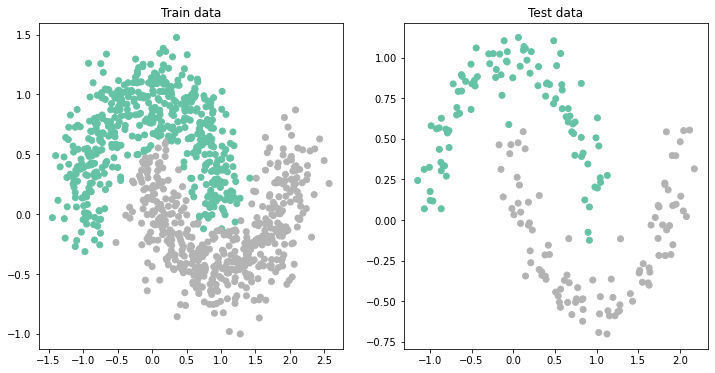

In [5]:
network.eval()
with torch.no_grad():
    a_train = network(X_train)
    a_test = network(X_test)
print("Test set accuracy: ", accuracy_score(y_test, np.where(a_test[:, 0].numpy()>0.5, 1, 0)))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=np.where(a_train[:, 0].numpy()>0.5, 1, 0), cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=np.where(a_test[:, 0].numpy()>0.5, 1, 0), cmap='Set2')
ax[1].set_title('Test data');

In [6]:
scooby.Report(core='torch')

--------------------------------------------------------------------------------
  Date: Sat Jul 23 12:50:48 2022 +03

                OS : Darwin
            CPU(s) : 10
           Machine : x86_64
      Architecture : 64bit
               RAM : 16.0 GiB
       Environment : Jupyter
       File system : apfs

  Python 3.7.13 (default, Mar 28 2022, 07:24:34)  [Clang 12.0.0 ]

             torch : 1.8.1
             numpy : 1.21.5
             scipy : 1.7.3
           IPython : 7.31.1
        matplotlib : 3.5.1
            scooby : 0.5.12

  Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------